<h1><center>ABET:Proyecto Integrador</center></h1>
<p><center><b>Adrián Rubén Bedón Campaña</b></center></p>
<p><center><b>Xavier Alejandro Ramos Vásconez</b></center></p>

In [26]:
#Importación de librerías
#|-Creado por: Adrián Bedón
#|-Fecha de última modificación: 06/06/2024 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as snn
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tkinter as tk
from tkinter import ttk


In [27]:
def recomendar_cancion(estado_depresion):
    if estado_depresion == 'Severe':
        recomendaciones = data_songs[data_songs['Predicted_Audio_Class'] == 4]
    elif estado_depresion == 'Moderate':
        recomendaciones = data_songs[data_songs['Predicted_Audio_Class'].isin([3, 4])]
    elif estado_depresion == 'Mild':
        recomendaciones = data_songs[data_songs['Predicted_Audio_Class'].isin([2, 3, 4])]
    elif estado_depresion == 'No depression':
        recomendaciones = data_songs
    
    if not recomendaciones.empty:
        cancion_recomendada = recomendaciones[['Song_name', 'Artist']].sample(1)
        return cancion_recomendada.to_dict('records')[0]
    else:
        return "No hay canciones que cumplan con los criterios de recomendación."

In [28]:
def mapping(x):
    if "No depression" in x:
        return "No depression"
    if "Mild" in x:
        return "Mild"
    if "Severe" in x:
        return "Severe"
    if "Moderate" in x:
        return "Moderate"

In [29]:
#Extracción y Limpieza de Datos
#|-Creado por: Adrián Bedón
#|-Fecha de creación: 06/06/2024
#|-Fecha de última modificación: 13/07/2024 
label_encoder = LabelEncoder()

data = pd.read_csv(r'C:\Users\xavir\Proyectos\Exercises\Bedón, Ramos - Proyecto Final\Deepression.csv')
data_songs = pd.read_csv(r'C:\Users\xavir\Proyectos\Exercises\Bedón, Ramos - Proyecto Final\master_song_data.csv')

null_values_initial = data.isnull().sum() #Valores nulos que existen en la data inicial
cleaned_data = data.dropna()
null_values_final = cleaned_data.isnull().sum() #Valores nulos tras la limpieza
for column in data.columns:
    print(f"{column}: {null_values_initial[column]} ----> {column}: {null_values_final[column]}")
cleaned_data.loc[:, 'Depression State'] = cleaned_data['Depression State'].apply(mapping)

data_songs = data_songs.iloc[: , [0,1,2,4,5,6,7,9,11,12,13,14]]

Number : 0 ----> Number : 0
Sleep: 273 ----> Sleep: 0
Appetite: 273 ----> Appetite: 0
Interest: 273 ----> Interest: 0
Fatigue: 273 ----> Fatigue: 0
Worthlessness: 273 ----> Worthlessness: 0
Concentration: 273 ----> Concentration: 0
Agitation: 273 ----> Agitation: 0
Suicidal Ideation: 273 ----> Suicidal Ideation: 0
Sleep Disturbance: 273 ----> Sleep Disturbance: 0
Aggression: 273 ----> Aggression: 0
Panic Attacks: 273 ----> Panic Attacks: 0
Hopelessness: 273 ----> Hopelessness: 0
Restlessness: 273 ----> Restlessness: 0
Low Energy: 273 ----> Low Energy: 0
Depression State: 273 ----> Depression State: 0


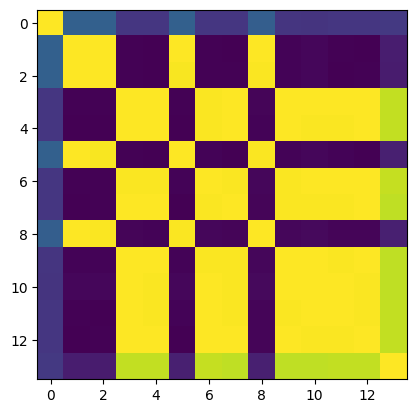

In [30]:
numeric_data = cleaned_data[['Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy']]
plt.imshow(numeric_data.corr())

In [31]:
#Etiquetado de Datos
#|-Creado por: Adrián Bedón
#|-Fecha de creación: 06/06/2024
#|-Fecha de última modificación: 13/07/2024
categorical_data = ["Mild", "Moderate", "Severe", "No depression"]
numerical_data = label_encoder.fit_transform(categorical_data)
print(dict(zip(categorical_data, numerical_data)))
one_hot_encoded_data = pd.get_dummies(cleaned_data)

audio_class_mapping = {
    'Sad': 1,
    'Tense': 2,
    'Relax': 3,
    'Happy': 4
}
data_songs['Audio_class_numeric'] = data_songs['Audio_class'].map(audio_class_mapping)

{'Mild': 0, 'Moderate': 1, 'Severe': 3, 'No depression': 2}


In [32]:
#Definición de Valores de Entrada y Salida
#|-Creado por: Adrián Bedón
#|-Fecha de creación: 06/06/2024
X = cleaned_data.drop('Depression State', axis=1)
X = X.drop('Number ', axis=1)
Y = cleaned_data['Depression State']

X_songs = data_songs[['Loudness', 'Valence', 'Danceability', 'Acousticness']]
Y_songs = data_songs['Audio_class_numeric']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
X_train_songs, X_test_songs, Y_train_songs, Y_test_songs = train_test_split(X_songs, Y_songs, test_size=0.5, random_state=42)

In [35]:
mdl_snn = snn.MLPClassifier(hidden_layer_sizes=(200, 300), max_iter=1000, random_state=42)
mdl_snn.fit(X_train, Y_train)
Y_pred_snn = mdl_snn.predict(X_test)

In [36]:
mdl_lrg = LogisticRegression(max_iter=10000, random_state=42)
mdl_lrg.fit(X_train, Y_train)
Y_pred_lrg = mdl_lrg.predict(X_test)

In [37]:
mdl_knn = neighbors.KNeighborsClassifier(n_neighbors=60)
mdl_knn.fit(X_train, Y_train)
Y_pred_knn = mdl_knn.predict(X_test)

In [38]:
mdl_svm = svm.SVC(kernel='rbf', random_state=42)
mdl_svm.fit(X_train, Y_train)
Y_pred_svm = mdl_svm.predict(X_test)

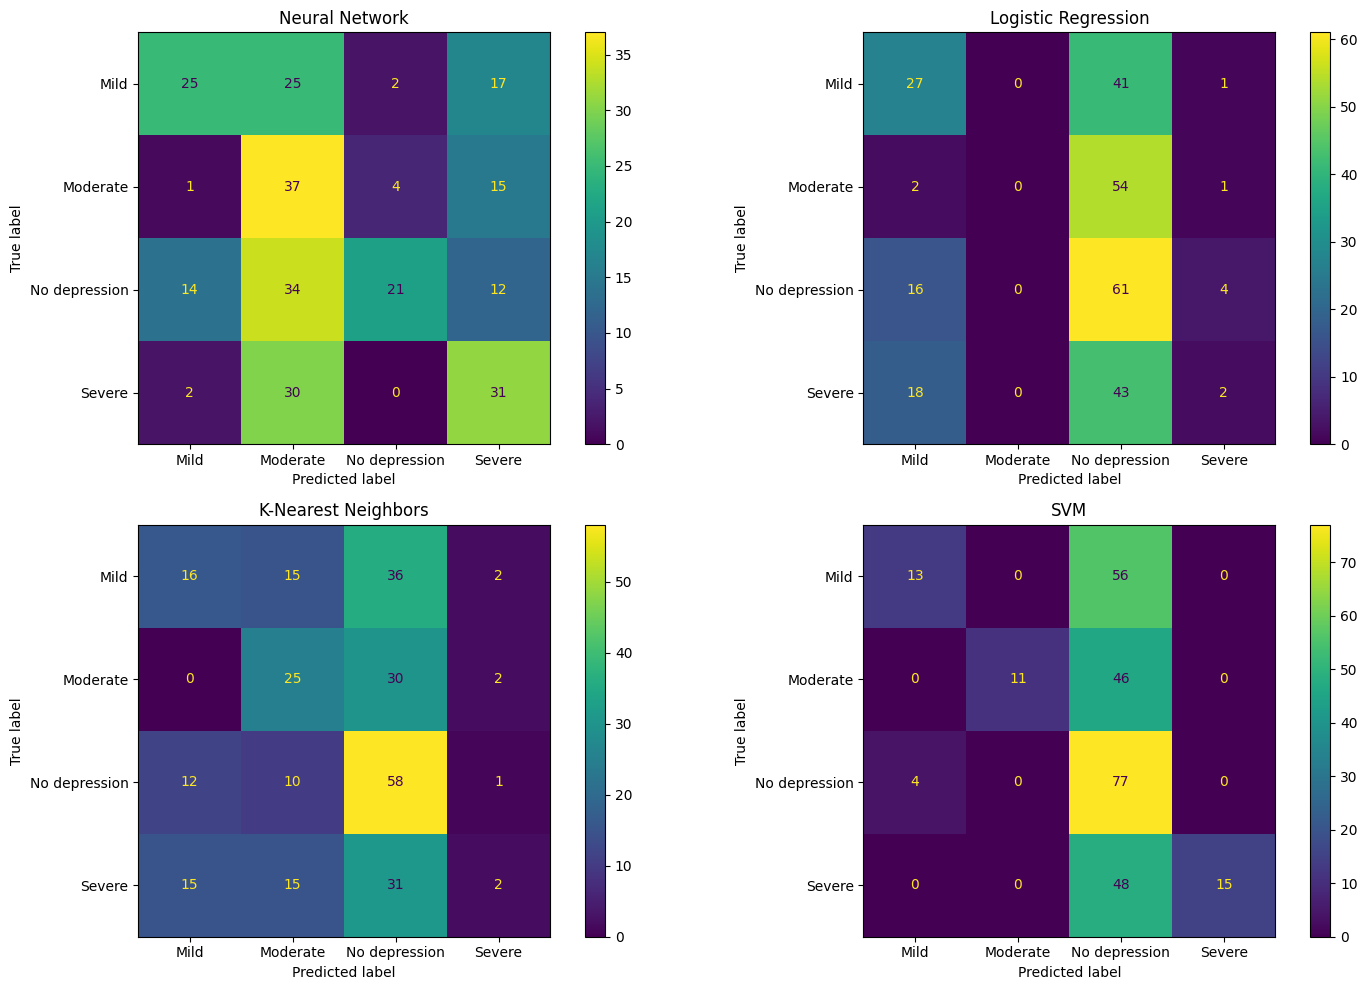

Neural Network:
                precision    recall  f1-score   support

         Mild      0.595     0.362     0.450        69
     Moderate      0.294     0.649     0.404        57
No depression      0.778     0.259     0.389        81
       Severe      0.413     0.492     0.449        63

     accuracy                          0.422       270
    macro avg      0.520     0.441     0.423       270
 weighted avg      0.544     0.422     0.422       270

Logistic Regression:
                precision    recall  f1-score   support

         Mild      0.429     0.391     0.409        69
     Moderate      0.000     0.000     0.000        57
No depression      0.307     0.753     0.436        81
       Severe      0.250     0.032     0.056        63

     accuracy                          0.333       270
    macro avg      0.246     0.294     0.225       270
 weighted avg      0.260     0.333     0.248       270

K-Nearest Neighbors:
                precision    recall  f1-score   suppor

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

cm_snn = metrics.confusion_matrix(Y_test, Y_pred_snn, labels=mdl_snn.classes_)
disp_snn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_snn, display_labels=mdl_snn.classes_)
disp_snn.plot(ax=axes[0,0], values_format='d')
axes[0,0].set_title("Neural Network")

cm_lrg = metrics.confusion_matrix(Y_test, Y_pred_lrg, labels=mdl_lrg.classes_)
disp_lrg = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lrg, display_labels=mdl_lrg.classes_)
disp_lrg.plot(ax=axes[0,1], values_format='d')
axes[0,1].set_title("Logistic Regression")

cm_knn = metrics.confusion_matrix(Y_test, Y_pred_knn, labels=mdl_knn.classes_)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=mdl_knn.classes_)
disp_knn.plot(ax=axes[1,0], values_format='d')
axes[1,0].set_title("K-Nearest Neighbors")

cm_svm = metrics.confusion_matrix(Y_test, Y_pred_svm, labels=mdl_svm.classes_)
disp_svm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=mdl_svm.classes_)
disp_svm.plot(ax=axes[1,1], values_format='d')
axes[1,1].set_title("SVM")

plt.tight_layout()
plt.show()

print("Neural Network:\n", metrics.classification_report(Y_test, Y_pred_snn, labels=mdl_snn.classes_, digits=3, zero_division=0))
print("Logistic Regression:\n", metrics.classification_report(Y_test, Y_pred_lrg, labels=mdl_lrg.classes_, digits=3, zero_division=0))
print("K-Nearest Neighbors:\n", metrics.classification_report(Y_test, Y_pred_knn, labels=mdl_knn.classes_, digits=3, zero_division=0))
print("SVM:\n", metrics.classification_report(Y_test, Y_pred_svm, labels=mdl_svm.classes_, digits=3, zero_division=0))

              precision    recall  f1-score   support

           1      0.875     1.000     0.933        49
           2      1.000     1.000     1.000        10
           3      1.000     0.750     0.857        28
           4      1.000     1.000     1.000        16

    accuracy                          0.932       103
   macro avg      0.969     0.938     0.948       103
weighted avg      0.941     0.932     0.929       103



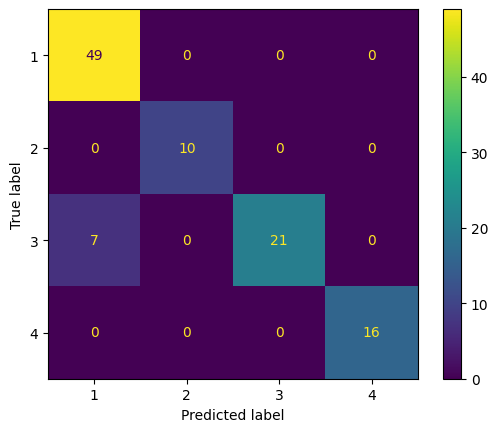

In [41]:
mdl_lrg_songs = LogisticRegression(max_iter=10000000)
mdl_lrg_songs.fit(X_train_songs, Y_train_songs)
Y_pred = mdl_lrg_songs.predict(X_test_songs)
prediction_lRegression_songs = np.array(Y_pred)
print(metrics.classification_report(Y_test_songs, prediction_lRegression_songs, labels=mdl_lrg_songs.classes_, digits=3))
cm = metrics.confusion_matrix(Y_test_songs, prediction_lRegression_songs, labels=mdl_lrg_songs.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_lrg_songs.classes_)
disp.plot()

# Interfaz

In [44]:
def collect_data():
    try:
        data_dict = {
            'Sleep': int(sleep_var.get().split(':')[0]), 
            'Appetite': int(appetite_var.get().split(':')[0]), 
            'Interest': int(interest_var.get().split(':')[0]), 
            'Fatigue': int(fatigue_var.get().split(':')[0]), 
            'Worthlessness': int(worthlessness_var.get().split(':')[0]), 
            'Concentration': int(concentration_var.get().split(':')[0]),
            'Agitation': int(agitation_var.get().split(':')[0]),
            'Suicidal Ideation': int(suicidal_ideation_var.get().split(':')[0]),
            'Sleep Disturbance': int(sleep_disturbance_var.get().split(':')[0]),
            'Aggression': int(aggression_var.get().split(':')[0]),
            'Panic Attacks': int(panic_attacks_var.get().split(':')[0]),
            'Hopelessness': int(hopelessness_var.get().split(':')[0]),
            'Restlessness': int(restlessness_var.get().split(':')[0]),
            'Low Energy': int(low_energy_var.get().split(':')[0])
        }

        data_production = pd.DataFrame(data_dict, index=[0])
        
        prediction_lRegression = mdl_lrg.predict(data_production)
        prediction_nNetwork = mdl_snn.predict(data_production)
        prediction_nNeighbors = mdl_knn.predict(data_production)
        prediction_svMachine = mdl_svm.predict(data_production)
        
        estado_depresion = prediction_lRegression[0]

        result_window = tk.Toplevel(root)
        result_window.title("Resultados de la Predicción")
        
        ttk.Label(result_window, text="Logistic Regression: " + str(prediction_lRegression)).pack()
        ttk.Label(result_window, text="Neural Network: " + str(prediction_nNetwork)).pack()
        ttk.Label(result_window, text="K-Nearest Neighbors: " + str(prediction_nNeighbors)).pack()
        ttk.Label(result_window, text="Support Vector Machine: " + str(prediction_svMachine)).pack()
        
        cancion_recomendada = recomendar_cancion(estado_depresion)
        ttk.Label(result_window, text="Canción Recomendada: " + cancion_recomendada['Song_name']).pack()
        ttk.Label(result_window, text="Artista: " + cancion_recomendada['Artist']).pack()

    except ValueError as e:
        error_window = tk.Toplevel(root)
        error_window.title("Error")
        ttk.Label(error_window, text=f"Error: {str(e)}").pack()

In [47]:
root = tk.Tk()
root.title("Evaluación de Estado de Ánimo")

# Crear variables para guardar las respuestas
sleep_var = tk.StringVar()
appetite_var = tk.StringVar()
interest_var = tk.StringVar()
fatigue_var = tk.StringVar()
worthlessness_var = tk.StringVar()
concentration_var = tk.StringVar()
agitation_var = tk.StringVar()
suicidal_ideation_var = tk.StringVar()
sleep_disturbance_var = tk.StringVar()
aggression_var = tk.StringVar()
panic_attacks_var = tk.StringVar()
hopelessness_var = tk.StringVar()
restlessness_var = tk.StringVar()
low_energy_var = tk.StringVar()

# Crear la interfaz de preguntas
questions = [
    ("Sleep", sleep_var),
    ("Appetite", appetite_var),
    ("Interest", interest_var),
    ("Fatigue", fatigue_var),
    ("Worthlessness", worthlessness_var),
    ("Concentration", concentration_var),
    ("Agitation", agitation_var),
    ("Suicidal Ideation", suicidal_ideation_var),
    ("Sleep Disturbance", sleep_disturbance_var),
    ("Aggression", aggression_var),
    ("Panic Attacks", panic_attacks_var),
    ("Hopelessness", hopelessness_var),
    ("Restlessness", restlessness_var),
    ("Low Energy", low_energy_var)
]

options = ["1: Never", "2: Always", "3: Often", "4: Rarely", "5: Sometimes", "6: Not at all"]

for question, var in questions:
    frame = ttk.Frame(root)
    frame.pack(fill='x')
    ttk.Label(frame, text=question).pack(side='left')
    combo = ttk.Combobox(frame, textvariable=var)
    combo['values'] = options
    combo.pack(side='right')

# Botón para enviar las respuestas y hacer la predicción
ttk.Button(root, text="Submit", command=collect_data).pack()

root.mainloop()